In [26]:
import pandas as pd
import os

# read in df
fn = 'working_cats/data/breeds_data_final.pkl'
breeds = pd.read_pickle(fn)
breeds

age  gender  size  coat  breed                                image
260    3.0     1.0   2.0   3.0    1.0  American Bobtail/46407834_34198.jpg
261    3.0     1.0   2.0   3.0    1.0  American Bobtail/46407781_34210.jpg
264    0.0     0.0   2.0   3.0    1.0  American Bobtail/46330160_41521.jpg
266    1.0     1.0   1.0   1.0    1.0  American Bobtail/46289156_45141.jpg
267    3.0     0.0   3.0   3.0    1.0  American Bobtail/46194971_53315.jpg
...    ...     ...   ...   ...    ...                                  ...
67139  1.0     0.0   2.0   3.0   65.0             Tuxedo/43784347_7292.jpg
67140  1.0     1.0   2.0   3.0   65.0             Tuxedo/43781057_7295.jpg
67141  0.0     0.0   2.0   3.0   65.0             Tuxedo/43773439_7304.jpg
67142  3.0     0.0   1.0   3.0   65.0             Tuxedo/43773383_7305.jpg
67143  0.0     1.0   2.0   2.0   65.0             Tuxedo/43773168_7306.jpg

[37807 rows x 6 columns]

Train shape: (22684, 6)
val shape: (7561, 6)
test shape: (7562, 6)
x_train[2]: Tuxedo/43937278_6979.jpg
y_train[2]: 65.0
Number of breeds: 26
['age', 'gender', 'size', 'coat', 'breed', 'image']


C:\Users\devon\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The number of FixedLocator locations (26), usually from a call to set_ticks, does not match the number of ticklabels (6).

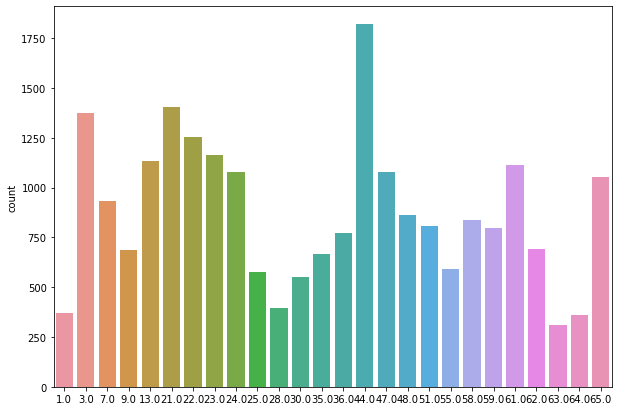

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# split into train, val, test sets
train, val, test = np.split(breeds.sample(frac=1, random_state=42),\
                            [int(.6*len(breeds)), int(.8*len(breeds))])


print("Train shape: "+str(train.shape))
print("val shape: "+str(val.shape))
print("test shape: "+str(test.shape))

# sets into x and y values
# x_train is image data
x_train = np.array(train.iloc[:,5])
y_train = np.array(train.iloc[:,4])
print('x_train[2]: '+str(x_train[2]))
print('y_train[2]: '+str(y_train[2]))

# resize images to 128x128

# number of breeds now
br = pd.unique(breeds['breed'])
num_breeds = len(br)
print('Number of breeds: '+str(num_breeds))

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=br)

In [ ]:
# traditional CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D